In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
import missingno as msno

In [2]:
data=pd.read_csv(r"C:\Users\Lenovo\Desktop\MainProject\city_day.csv")

In [3]:
data.head()

,State,City,station,StationName,Status,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Gujarat,Ahmedabad,GJ001,"Maninagar, Ahmedabad - GPCB",Active,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


# Exploratory Data Analysis

In [4]:
data.shape

(29531, 20)

In [5]:
data.isna().sum()

State              0
City               0
station            0
StationName        0
Status           324
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
AQI_Bucket      4681
dtype: int64

15 columns out of 20 has null values in it

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        29531 non-null  object 
 1   City         29531 non-null  object 
 2   station      29531 non-null  object 
 3   StationName  29531 non-null  object 
 4   Status       29207 non-null  object 
 5   Date         29531 non-null  object 
 6   PM2.5        24933 non-null  float64
 7   PM10         18391 non-null  float64
 8   NO           25949 non-null  float64
 9   NO2          25946 non-null  float64
 10  NOx          25346 non-null  float64
 11  NH3          19203 non-null  float64
 12  CO           27472 non-null  float64
 13  SO2          25677 non-null  float64
 14  O3           25509 non-null  float64
 15  Benzene      23908 non-null  float64
 16  Toluene      21490 non-null  float64
 17  Xylene       11422 non-null  float64
 18  AQI          24850 non-null  float64
 19  AQI_

Out of the 20 attributes of the dataset,7 are of 'object' datatype and rest 13 are of 'float' datatype.

In [7]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [8]:
data.State.unique()

array(['Gujarat', 'Mizoram', 'Andhra Pradesh', 'Punjab', 'Karnataka',
       'Madhya Pradesh', 'Odisha', 'Chandigarh', 'Tamilnadu', 'Delhi',
       'Kerala', 'Haryana', 'Assam', 'Telengana', 'Rajasthan',
       'Jharkhand', 'kerala', 'West Bengal', 'Uttar Pradesh',
       'Maharashtra', 'Bihar', 'Meghalaya'], dtype=object)

In [9]:
data['State'].value_counts()

Andhra Pradesh    2413
Tamilnadu         2395
Gujarat           2009
Karnataka         2009
Maharashtra       2009
Uttar Pradesh     2009
Delhi             2009
Telengana         2006
Odisha            1863
Bihar             1858
Haryana           1679
Kerala            1355
Punjab            1221
Jharkhand         1169
Rajasthan         1114
West Bengal        814
Assam              502
Meghalaya          310
Chandigarh         304
Madhya Pradesh     289
Mizoram            113
kerala              81
Name: State, dtype: int64

Kerala data is counted twice.Hence replacing 'kerala' with 'Kerala'

In [10]:
data.loc[data["State"] == "kerala", "State"] = 'Kerala'

In [11]:
print(data['State'].unique())
print(data['State'].value_counts())

['Gujarat' 'Mizoram' 'Andhra Pradesh' 'Punjab' 'Karnataka'
 'Madhya Pradesh' 'Odisha' 'Chandigarh' 'Tamilnadu' 'Delhi' 'Kerala'
 'Haryana' 'Assam' 'Telengana' 'Rajasthan' 'Jharkhand' 'West Bengal'
 'Uttar Pradesh' 'Maharashtra' 'Bihar' 'Meghalaya']
Andhra Pradesh    2413
Tamilnadu         2395
Gujarat           2009
Karnataka         2009
Maharashtra       2009
Uttar Pradesh     2009
Delhi             2009
Telengana         2006
Odisha            1863
Bihar             1858
Haryana           1679
Kerala            1436
Punjab            1221
Jharkhand         1169
Rajasthan         1114
West Bengal        814
Assam              502
Meghalaya          310
Chandigarh         304
Madhya Pradesh     289
Mizoram            113
Name: State, dtype: int64


<AxesSubplot:>

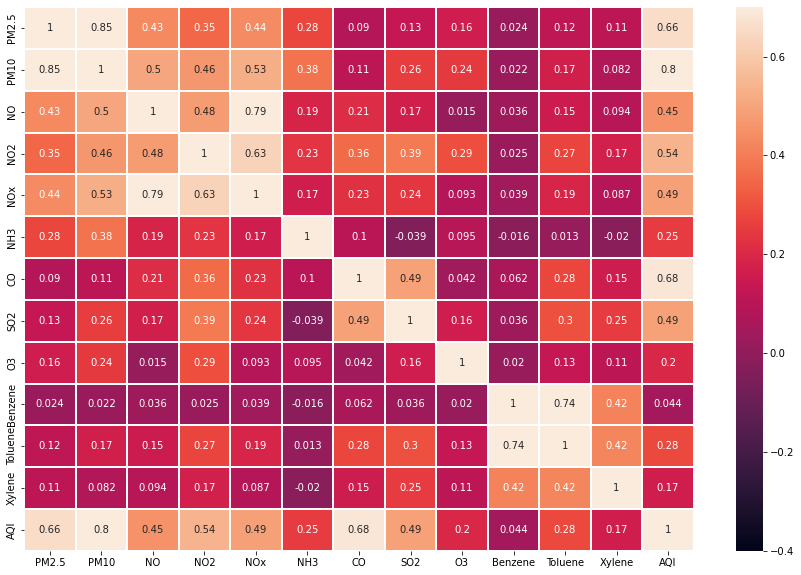

In [12]:
corrmatrix=data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,vmin= -0.4,vmax=.7,annot=True,linewidth=0.3)

- We should find that there is a PM2.5- PM10 , NOx-NO, NOx-NO2, Benzene-Toluene are positively co-related

## Identifying major pollutants and concentration in each city

([<matplotlib.patches.Wedge at 0x217ec2dd490>,
 [Text(-1.0329446755118679, -0.3781868550487737, 'NO'),
  Text(-0.3235708424829275, -1.0513333961664533, 'NO2'),
  Text(0.8629833278136636, -0.6820995351967741, 'NOx'),
  Text(1.048099493243424, 0.3338973678585654, 'NH3'),
  Text(0.8391992815762234, 0.7111572018913617, 'CO'),
  Text(0.5590246290294517, 0.9473602610087062, 'SO2'),
  Text(-0.4597347640780949, 0.9993217433329762, 'O3'),
  Text(-1.0122482017330416, 0.43052709332656813, 'Benzene'),
  Text(-1.07853531188145, 0.2162442624089334, 'Toluene'),
  Text(-1.0995994565001022, 0.02968223820199599, 'Xylene')],
 [Text(-0.5634243684610188, -0.2062837391175129, '11.2%'),
  Text(-0.17649318680886952, -0.5734545797271563, '18.2%'),
  Text(0.4707181788074528, -0.3720542919255131, '20.1%'),
  Text(0.5716906326782312, 0.18212583701376292, '11.0%'),
  Text(0.4577450626779399, 0.38790392830437903, '1.5%'),
  Text(0.3049225249251555, 0.5167419605502034, '9.1%'),
  Text(-0.2507644167698699, 0.54508458

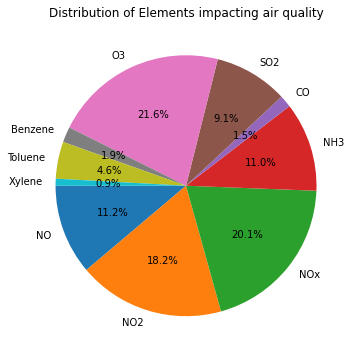

In [13]:
#Distribustion of Elements which are impacting air quality
Pollutants_list = ['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
pollutants = data[Pollutants_list].sum()
plt.figure(figsize=(12,6))
plt.title('Distribution of Elements impacting air quality')
plt.pie(pollutants, labels=pollutants.index, autopct='%1.1f%%', startangle=180)

[Text(0, 0, 'Ahmedabad'),
 Text(1, 0, 'Aizawl'),
 Text(2, 0, 'Amaravati'),
 Text(3, 0, 'Amritsar'),
 Text(4, 0, 'Bengaluru'),
 Text(5, 0, 'Bhopal'),
 Text(6, 0, 'Brajrajnagar'),
 Text(7, 0, 'Chandigarh'),
 Text(8, 0, 'Chennai'),
 Text(9, 0, 'Coimbatore'),
 Text(10, 0, 'Delhi'),
 Text(11, 0, 'Ernakulam'),
 Text(12, 0, 'Gurugram'),
 Text(13, 0, 'Guwahati'),
 Text(14, 0, 'Hyderabad'),
 Text(15, 0, 'Jaipur'),
 Text(16, 0, 'Jorapokhar'),
 Text(17, 0, 'Kochi'),
 Text(18, 0, 'Kolkata'),
 Text(19, 0, 'Lucknow'),
 Text(20, 0, 'Mumbai'),
 Text(21, 0, 'Patna'),
 Text(22, 0, 'Shillong'),
 Text(23, 0, 'Talcher'),
 Text(24, 0, 'Thiruvananthapuram'),
 Text(25, 0, 'Visakhapatnam')]

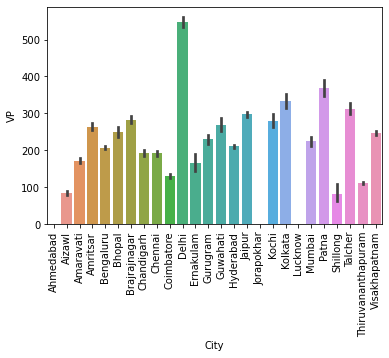

In [14]:
#Study of effect of industry pollutants and vehicle pollutants 
data1=data.copy()
data1['VP'] = data1['PM2.5']+data1['PM10']+data1['NO']+data1['NO2']+data1['NOx']+data1['NH3']+data1['CO']
ax=sns.barplot('City','VP',data=data1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)



Vehicle pollution is highest in Delhi and least in Aizawl

In [ ]:
data1['IP']=data1['SO2']+data1['O3']+data1['Benzene']+data1['Toluene']+data1['Xylene']
ax=sns.barplot('City','IP',data=data1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Industry pollution is highest in Ahmedabad and Shillong and least in Kochi

In [ ]:
#Univariate and bivariate analysis using pair plotting
sns.pairplot(data)

In [ ]:
# frequency distribution of the pollutants before filling missing value

freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

All the graphs are right-screwed

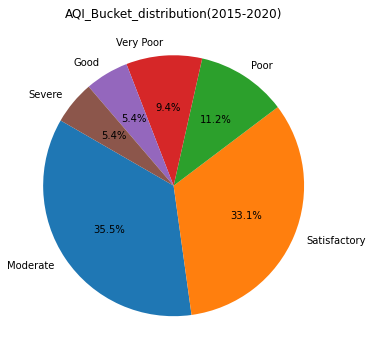

In [18]:
# count graph of the categorical features before filling missing value
#piechart on AQI_Bucket_distribution(2015-2020)
AQI_Bucket_distribution =data.AQI_Bucket.value_counts()
plt.figure(figsize=(10,6))
plt.title('AQI_Bucket_distribution(2015-2020)')
plt.pie(AQI_Bucket_distribution, labels=AQI_Bucket_distribution.index, autopct='%1.1f%%', startangle=150);

Text(0.5, 1.0, 'AQI')

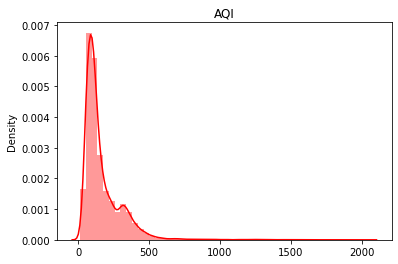

In [19]:
# distplot Air Quality Index per density
sns.distplot(x=data['AQI'],color='red')
plt.title('AQI')

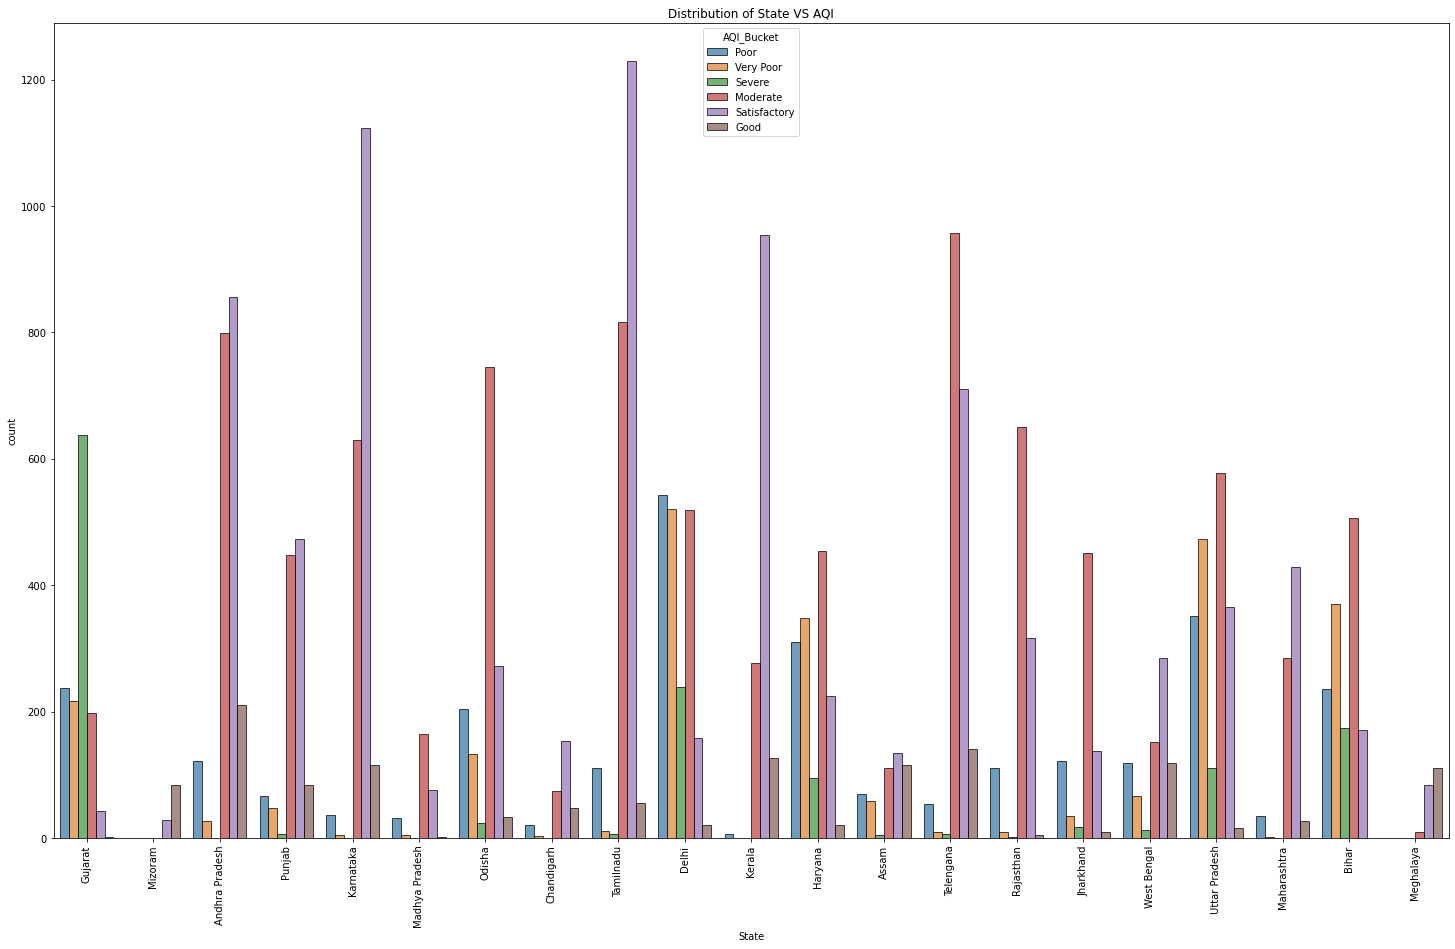

In [20]:
plt.figure(figsize=[25,15])
sns.countplot(x='State',hue='AQI_Bucket',edgecolor="black", alpha=0.7, data=data)
plt.title('Distribution of State VS AQI')
plt.xticks(rotation=90) 
plt.show()

Most of the datas of Gujarat contain severe AQI and All the states there are only few good AQI index when cpmapred to the rest of the indexs.

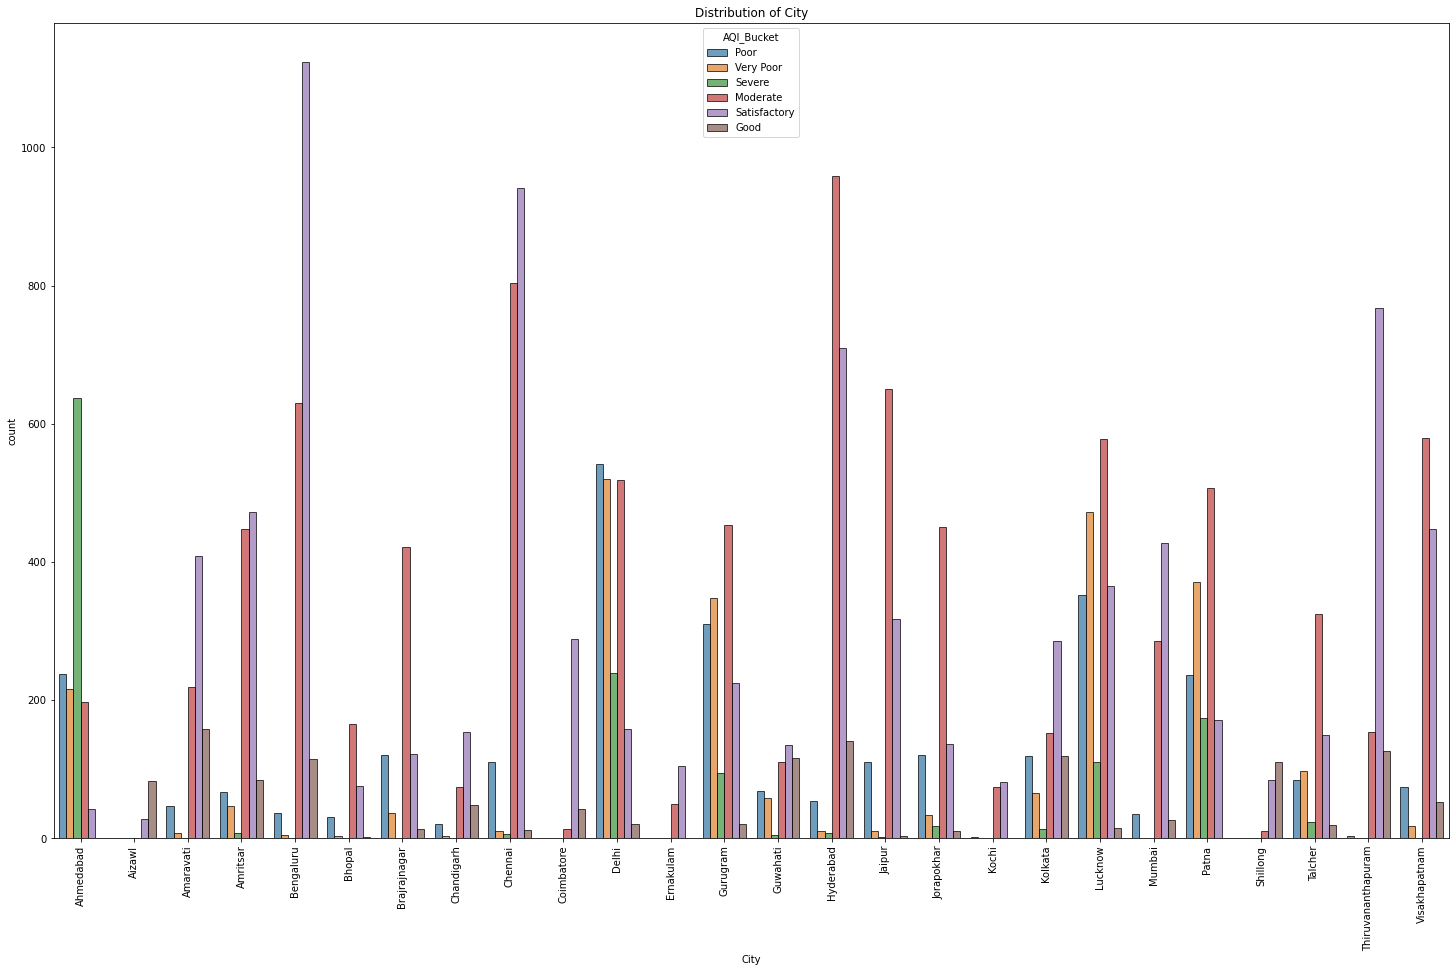

In [21]:
plt.figure(figsize=[25,15])
sns.countplot(x='City',hue='AQI_Bucket',edgecolor="black", alpha=0.7, data=data)
plt.title('Distribution of City')
plt.xticks(rotation=90) 
plt.show()

Most of the cities have either moderate or satisfactory AQI indexes expect for Ahmedabad from 2015-2020 

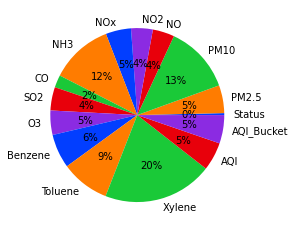

In [22]:
data1=[324,4598,11140,3582,3585,4185,10328,2059,3854,4022,5623,8041,18109,4681,4681]
labels = ['Status','PM2.5',
       'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

colors=sns.color_palette('bright')[0:5]
plt.pie(data1,labels=labels,colors=colors,autopct='%.0f%%')
plt.show()

Above graph shows the percentage of distribution of null values present in each feature. We should find that Xylene has the most number of null value percentage

# Data Pre-processing

## Handling Missing  Value, Feature Reduction, Feature ENgineering

In [23]:
data.isna().sum()

State              0
City               0
station            0
StationName        0
Status           324
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
AQI_Bucket      4681
dtype: int64

<AxesSubplot:>

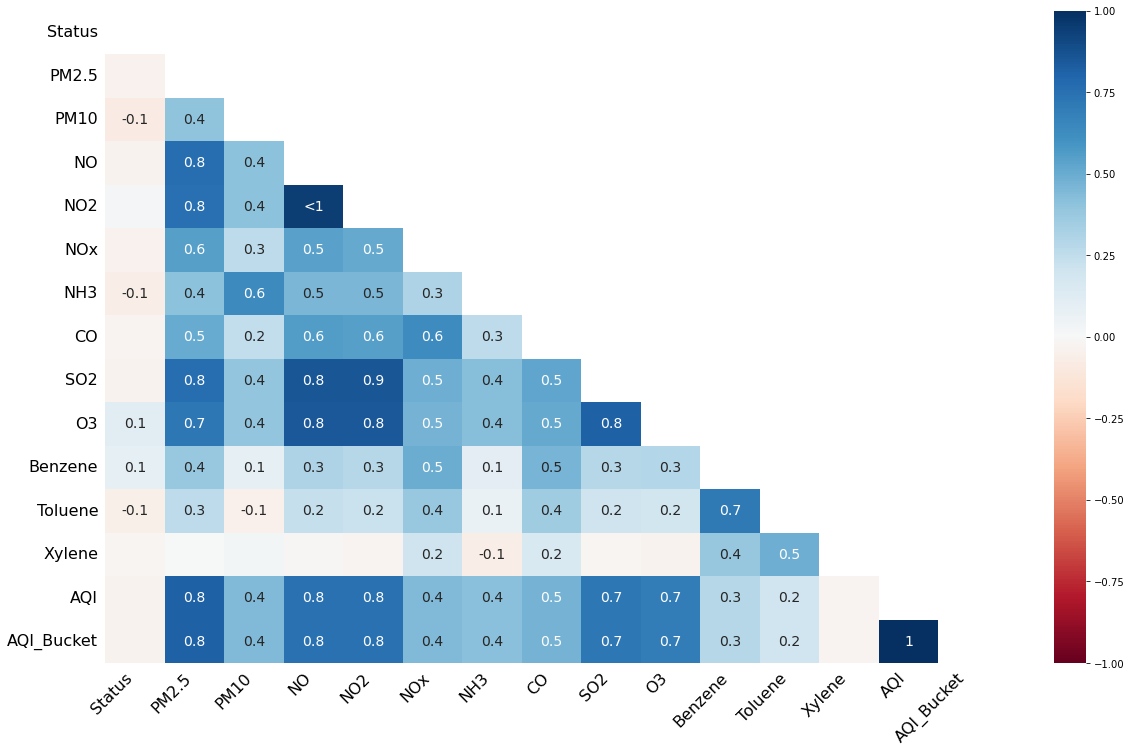

In [24]:
#visualization of missing data 
msno.heatmap(data)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        29531 non-null  object 
 1   City         29531 non-null  object 
 2   station      29531 non-null  object 
 3   StationName  29531 non-null  object 
 4   Status       29207 non-null  object 
 5   Date         29531 non-null  object 
 6   PM2.5        24933 non-null  float64
 7   PM10         18391 non-null  float64
 8   NO           25949 non-null  float64
 9   NO2          25946 non-null  float64
 10  NOx          25346 non-null  float64
 11  NH3          19203 non-null  float64
 12  CO           27472 non-null  float64
 13  SO2          25677 non-null  float64
 14  O3           25509 non-null  float64
 15  Benzene      23908 non-null  float64
 16  Toluene      21490 non-null  float64
 17  Xylene       11422 non-null  float64
 18  AQI          24850 non-null  float64
 19  AQI_

In [26]:
# % of null value in each column

null_values_percent=(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)
null_values_percent

Xylene         61.322001
PM10           37.723071
NH3            34.973418
Toluene        27.229014
Benzene        19.041008
AQI_Bucket     15.851139
AQI            15.851139
PM2.5          15.570079
NOx            14.171549
O3             13.619586
SO2            13.050692
NO2            12.139785
NO             12.129626
CO              6.972334
Status          1.097152
City            0.000000
Date            0.000000
StationName     0.000000
station         0.000000
State           0.000000
dtype: float64

- About 60% of the Xylene feature has null values.Hence it is better to drop the column as it is a least effective AQI pollutant
- Also, since it is a time series it is not good to remove/drop any null value rows as it may affect the prediction.

In [27]:
#Converting dtype of date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].apply(lambda x:x.year)
data['month'] = data['Date'].apply(lambda x:x.month)
data['day'] = data['Date'].apply(lambda x:x.day)

In [28]:
data=data.drop(['Date','station','StationName','Status'],axis=1)

- All the value of status are 'Active' hence it is irrelevant for modeling
- In our model we are trying to predict the AQI of the City hence Station and Station name is irrelavant

In [29]:
data.columns

Index(['State', 'City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'year', 'month', 'day'],
      dtype='object')

In [30]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,Gujarat,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1
1,Gujarat,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2,1
2,Gujarat,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3,1
3,Gujarat,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4,1
4,Gujarat,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5,1


<AxesSubplot:>

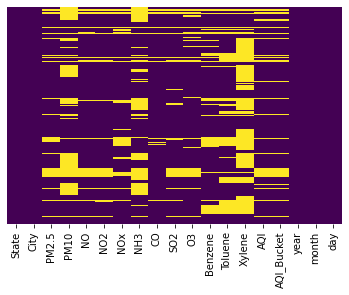

In [31]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
data.iloc[:,2:14]=data.groupby(['City','year','month']).transform(lambda x:x.fillna(x.mean()))

In [33]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,Gujarat,Ahmedabad,75.562308,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1
1,Gujarat,Ahmedabad,112.385217,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2,1
2,Gujarat,Ahmedabad,107.799655,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3,1
3,Gujarat,Ahmedabad,95.540714,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4,1
4,Gujarat,Ahmedabad,83.405172,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5,1


<AxesSubplot:>

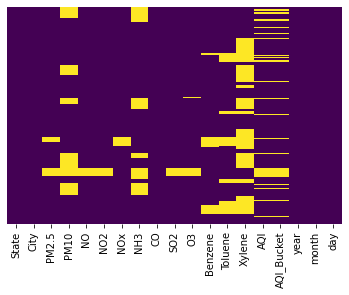

In [34]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
data.iloc[:,2:14]=data.groupby(['City','year']).transform(lambda x:x.fillna(x.mean()))

In [36]:
data.iloc[:,2:14]=data.groupby('City').transform(lambda x:x.fillna(x.mean()))

<AxesSubplot:>

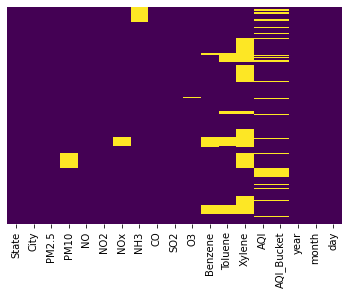

In [37]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,Gujarat,Ahmedabad,75.562308,113.39947,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,1
1,Gujarat,Ahmedabad,112.385217,113.39947,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2,1
2,Gujarat,Ahmedabad,107.799655,113.39947,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3,1
3,Gujarat,Ahmedabad,95.540714,113.39947,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4,1
4,Gujarat,Ahmedabad,83.405172,113.39947,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5,1


In [39]:
data.loc[:,2:14]=data.fillna(data.mean())

In [40]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,year,month,day
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,24850.000000,29531.000000,29531.000000,29531.000000
mean,66.925005,123.356776,18.467196,28.540408,32.625315,24.900495,2.561965,17.392552,33.951188,3.353751,8.343374,3.047685,166.463581,2017.887914,6.362771,15.667129
std,61.442120,83.921679,22.359100,23.949649,30.138505,26.027411,7.415206,22.095036,20.855935,14.424344,17.562157,4.169401,140.696585,1.533783,3.444773,8.901108
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000,1.000000,1.000000
25%,31.309000,64.623793,6.030000,12.005000,14.105000,10.663333,0.520000,5.970000,18.870000,0.190000,0.680000,0.810000,81.000000,2017.000000,3.000000,8.000000
50%,49.620000,107.461429,10.670000,22.570000,25.370000,20.910000,0.910000,9.920000,29.890000,1.460000,4.010000,3.047685,118.000000,2018.000000,6.000000,16.000000
75%,78.685000,152.860000,23.430000,36.768000,39.960000,29.870000,1.520000,17.760000,44.125000,3.353751,8.343374,3.047685,208.000000,2019.000000,9.000000,23.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000,12.000000,31.000000


In [41]:
data.tail()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
29526,Andhra Pradesh,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.2400,12.070,0.730,41.0,Good,2020,6,27
29527,Andhra Pradesh,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.7400,2.210,0.380,70.0,Satisfactory,2020,6,28
29528,Andhra Pradesh,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.0100,0.010,0.000,68.0,Satisfactory,2020,6,29
29529,Andhra Pradesh,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.0000,0.000,0.000,54.0,Satisfactory,2020,6,30
29530,Andhra Pradesh,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,4.5504,9.396,2.232,50.0,Good,2020,1,7


<AxesSubplot:>

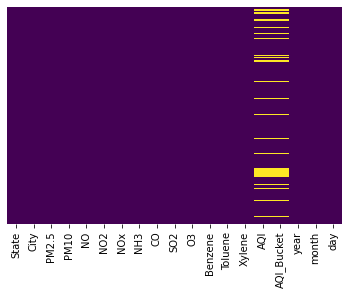

In [42]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

AQI calculation is using the 7 subindex measures:PM2.5,PM10,SO2,NOx,NH3,CO and O3

In [43]:
#PM10 sub_index calculation
def get_PM10_subindex(x):
    if x<=50:
        return x
    elif x>50 and x<=100:
        return x
    elif x>100 and x<=250:
        return 100+(x-100)*100/150
    elif x>250 and x<=350:
        return 200+(x-250)
    elif x>350 and x<=430:
        return 300+(x-350)*100/80
    elif x>430:
        return 400+(x-430)*100/80
    else:
        return 0
data['PM10_subindex']=data['PM10'].astype(int).apply(lambda x:get_PM10_subindex(x))
d1=data[['PM10','PM10_subindex']]
d1.head()

,PM10,PM10_subindex
0,113.39947,108.666667
1,113.39947,108.666667
2,113.39947,108.666667
3,113.39947,108.666667
4,113.39947,108.666667


In [44]:
def get_PM25_subindex(x):
    if x<=30:
        return x*50/30
    elif x>30 and x<=60:
        return 50+(x-30)*50/30
    elif x>60 and x<=90:
        return 100+(x-60)*100/30
    elif x>90 and x<=120:
        return 200+(x-90)*100/30
    elif x>120 and x<=250:
        return 300+(x-120)*100/130
    elif x>250:
        return 400+(x-250)*100/130
    else:
        return 0
data['PM2.5_subindex']=data['PM2.5'].astype(int).apply(lambda x:get_PM25_subindex(x))
    

In [45]:
def get_SO2_subindex(x):
    if x<=40:
        return x*50/40
    elif x>40 and x<=80:
        return 50+(x-40)*50/40
    elif x>80 and x<=380:
        return 100+(x-80)*100/300
    elif x>380 and x<=800:
        return 200+(x-380)*100/420
    elif x>800 and x<=1600:
        return 300+(x-800)*100/800
    elif x>1600:
        return 400+(x-1600)*100/800
    else:
        return 0
data['SO2_subindex']=data['SO2'].astype(int).apply(lambda x:get_SO2_subindex(x))

In [46]:
def get_NOx_subindex(x):
    if x<=40:
        return x*50/40
    elif x>40 and x<=80:
        return 50+(x-40)*50/40
    elif x>80 and x<=180:
        return 100+(x-80)*100/100
    elif x>180 and x<=280:
        return 200+(x-180)*100/100
    elif x>280 and x<=400:
        return 300+(x-280)*100/120
    elif x>400:
        return 400+(x-400)*100/120
    else:
        return 0
data['NOx_subindex']=data['NOx'].astype(int).apply(lambda x:get_NOx_subindex(x))

In [47]:
def get_NH3_subindex(x):
    if x<=200:
        return x*50/200
    elif x>200 and x<=400:
        return 50+(x-200)*50/200
    elif x>400 and x<=800:
        return 100+(x-400)*100/400
    elif x>800 and x<=1200:
        return 200+(x-800)*100/400
    elif x>1200 and x<=1800:
        return 300+(x-1200)*100/600
    elif x>1800:
        return 400+(x-1800)*100/600
    else:
        return 0
data['NH3_subindex']=data['NH3'].astype(int).apply(lambda x:get_NH3_subindex(x))

In [48]:
def get_CO_subindex(x):
    if x<=1:
        return x*50/1
    elif x>1 and x<=2:
        return 50+(x-1)*50/1
    elif x>2 and x<=10:
        return 100+(x-2)*100/8
    elif x>10 and x<=17:
        return 200+(x-10)*100/7
    elif x>17 and x<=34:
        return 300+(x-17)*100/17
    elif x>34:
        return 400+(x-34)*100/17
    else:
        return 0
data['CO_subindex']=data['CO'].astype(int).apply(lambda x:get_CO_subindex(x))

In [49]:
def get_O3_subindex(x):
    if x<=50:
        return x*50/50
    elif x>50 and x<=100:
        return 50+(x-50)*50/50
    elif x>100 and x<=168:
        return 100+(x-100)*100/68
    elif x>168 and x<=208:
        return 200+(x-168)*100/40
    elif x>208 and x<=748:
        return 300+(x-208)*100/539
    elif x>748:
        return 400+(x-400)*100/539
    else:
        return 0
data['O3_subindex']=data['O3'].astype(int).apply(lambda x:get_O3_subindex(x))

In [50]:
data['AQI']=data['AQI'].fillna(round(data[['PM2.5_subindex','PM10_subindex','SO2_subindex','NOx_subindex','NH3_subindex','CO_subindex','O3_subindex']].max(axis=1)))

In [51]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,year,month,day,PM10_subindex,PM2.5_subindex,SO2_subindex,NOx_subindex,NH3_subindex,CO_subindex,O3_subindex
0,Gujarat,Ahmedabad,75.562308,113.39947,0.92,18.22,17.15,24.900495,0.92,27.64,...,2015,1,1,108.666667,150.000000,33.75,21.25,6.0,0.000000,148.529412
1,Gujarat,Ahmedabad,112.385217,113.39947,0.97,15.69,16.46,24.900495,0.97,24.55,...,2015,2,1,108.666667,273.333333,30.00,20.00,6.0,0.000000,34.000000
2,Gujarat,Ahmedabad,107.799655,113.39947,17.40,19.30,29.70,24.900495,17.40,29.07,...,2015,3,1,108.666667,256.666667,36.25,36.25,6.0,300.000000,30.000000
3,Gujarat,Ahmedabad,95.540714,113.39947,1.70,18.48,17.97,24.900495,1.70,18.59,...,2015,4,1,108.666667,216.666667,22.50,21.25,6.0,50.000000,36.000000
4,Gujarat,Ahmedabad,83.405172,113.39947,22.10,21.42,37.76,24.900495,22.10,39.33,...,2015,5,1,108.666667,176.666667,48.75,46.25,6.0,329.411765,39.000000


In [52]:
data.AQI.describe()

count    29531.000000
mean       167.350411
std        136.555393
min          9.000000
25%         85.000000
50%        118.000000
75%        212.000000
max       2049.000000
Name: AQI, dtype: float64

In [53]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
data["AQI_Bucket"] = data["AQI_Bucket"].fillna(data["AQI"].apply(lambda x: get_AQI_bucket(x)))

<AxesSubplot:>

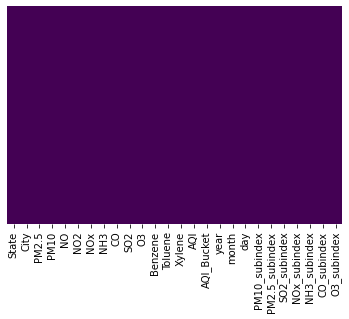

In [54]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

All the null values are filled using mean, and AQI calculation

In [56]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,year,month,day,PM10_subindex,PM2.5_subindex,SO2_subindex,NOx_subindex,NH3_subindex,CO_subindex,O3_subindex
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,...,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,66.925005,123.356776,18.467196,28.540408,32.625315,24.900495,2.561965,17.392552,33.951188,3.353751,...,2017.887914,6.362771,15.667129,112.470808,124.239226,20.223457,39.560205,6.079823,46.029895,33.559006
std,61.442120,83.921679,22.359100,23.949649,30.138505,26.027411,7.415206,22.095036,20.855935,14.424344,...,1.533783,3.444773,8.901108,72.330068,108.107763,23.470350,35.199937,6.510279,86.070224,21.420535
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,...,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.309000,64.623793,6.030000,12.005000,14.105000,10.663333,0.520000,5.970000,18.870000,0.190000,...,2017.000000,3.000000,8.000000,64.000000,51.666667,6.250000,17.500000,2.500000,0.000000,18.000000
50%,49.620000,107.461429,10.670000,22.570000,25.370000,20.910000,0.910000,9.920000,29.890000,1.460000,...,2018.000000,6.000000,16.000000,104.666667,81.666667,11.250000,31.250000,5.000000,0.000000,29.000000
75%,78.685000,152.860000,23.430000,36.768000,39.960000,29.870000,1.520000,17.760000,44.125000,3.353751,...,2019.000000,9.000000,23.000000,134.666667,160.000000,21.250000,48.750000,7.250000,50.000000,44.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,...,2020.000000,12.000000,31.000000,1112.500000,937.692308,137.666667,455.833333,88.000000,1229.411765,309.090909


<AxesSubplot:>

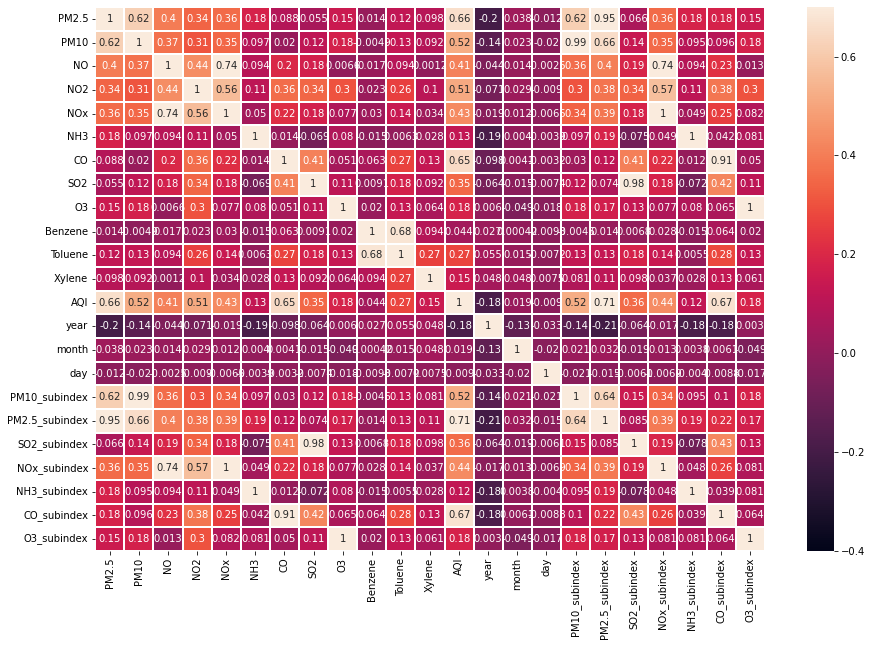

In [57]:
corrmatrix=data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,vmin= -0.4,vmax=.7,annot=True,linewidth=0.3)

# Handling outliers

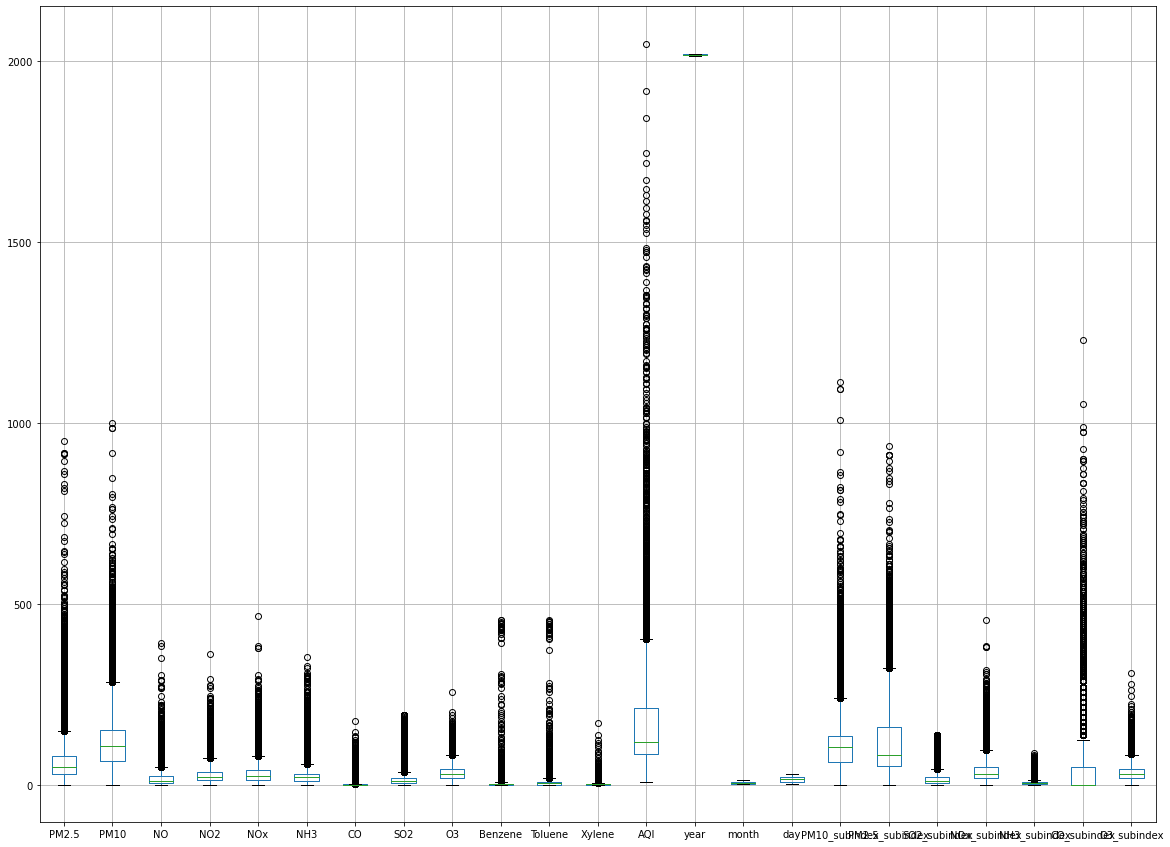

In [58]:
graph=data.select_dtypes(include=['float64','int64'])
graph.boxplot(figsize=(20,15))
plt.show()

In [59]:
#Outliers count in each column
#data=data.drop(['Date'],axis=1)
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

AQI               1405
AQI_Bucket           0
Benzene           1822
CO                2958
CO_subindex       2334
City                 0
NH3               1640
NH3_subindex      1682
NO                2083
NO2               1484
NOx               2147
NOx_subindex      2237
O3                 856
O3_subindex        772
PM10              1547
PM10_subindex     1444
PM2.5             2486
PM2.5_subindex    2482
SO2               3743
SO2_subindex      3707
State                0
Toluene           3280
Xylene            1912
day                  0
month                0
year                 0
dtype: int64


In [60]:
for features in ['Benzene','CO','NH3','NO','NO2','PM2.5','PM10','NOx','O3','SO2','Toluene','Xylene','AQI','CO_subindex','NH3_subindex','NOx_subindex','O3_subindex','PM10_subindex','PM2.5_subindex','SO2_subindex']:
    OF_Q1=data[features].quantile(0.25)
    OF_Q2=data[features].quantile(0.50)
    OF_Q3=data[features].quantile(0.75)
    OF_IQR=OF_Q3-OF_Q1
    OF_low_limit=OF_Q1-1.5*OF_IQR
    OF_up_limit=OF_Q3+1.5*OF_IQR
    OF_outlier=data[(data[features]<OF_low_limit)|(data[features]>OF_low_limit)]
    data[features]=data[features].clip(OF_up_limit,OF_low_limit)

In [61]:
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

AQI               0
AQI_Bucket        0
Benzene           0
CO                0
CO_subindex       0
City              0
NH3               0
NH3_subindex      0
NO                0
NO2               0
NOx               0
NOx_subindex      0
O3                0
O3_subindex       0
PM10              0
PM10_subindex     0
PM2.5             0
PM2.5_subindex    0
SO2               0
SO2_subindex      0
State             0
Toluene           0
Xylene            0
day               0
month             0
year              0
dtype: int64


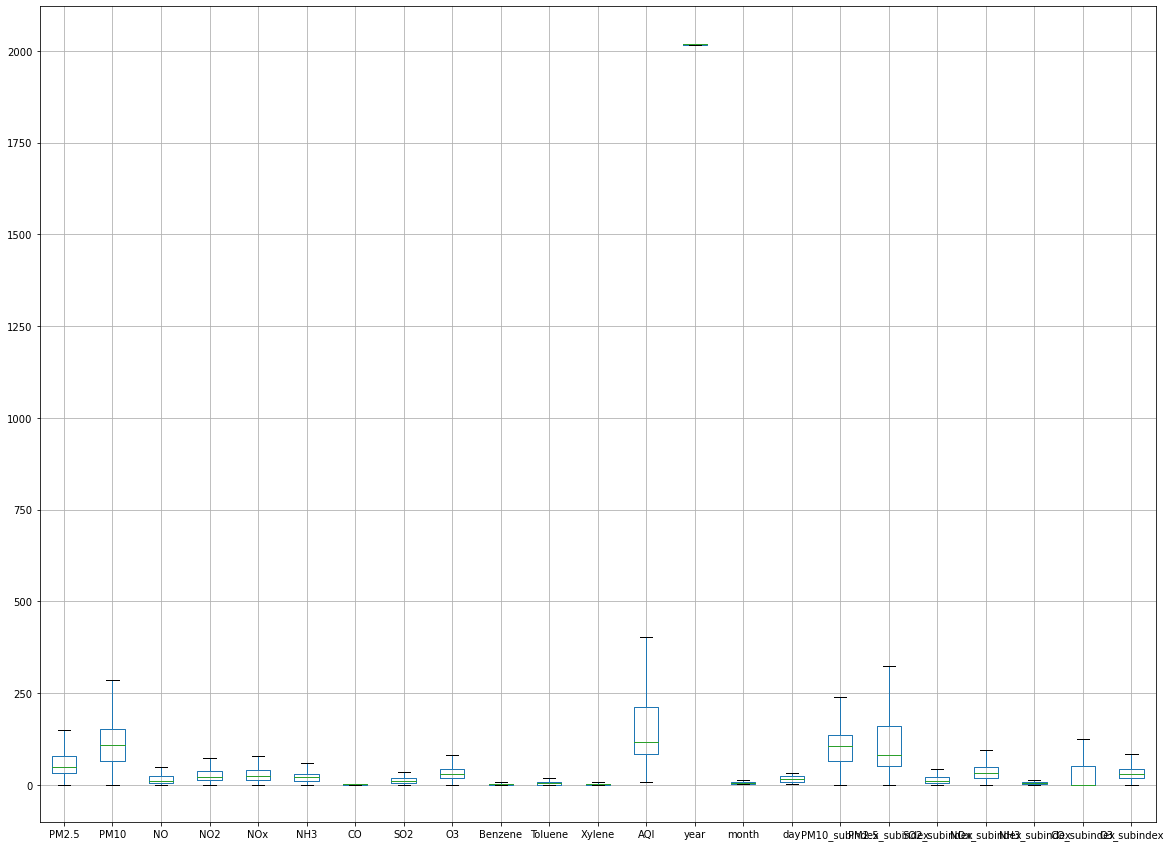

In [62]:
#Finding outliers
graph=data.select_dtypes(include=['float64','int64'])
graph.boxplot(figsize=(20,15))
plt.show()

In [64]:
#Label encoding
label_encoding = {
    "State":{'Andhra Pradesh':0, 'Assam':1, 'Bihar':2, 'Chandigarh':3, 'Delhi':4, 'Gujarat':5, 'Haryana':6,
 'Jharkhand':7, 'Karnataka':8, 'Kerala':9, 'Madhya Pradesh':10, 'Maharashtra':11,
 'Meghalaya':12, 'Mizoram':13, 'Odisha':14, 'Punjab':15, 'Rajasthan':16, 'Tamilnadu':17,
 'Telengana':18, 'Uttar Pradesh':19, 'West Bengal':20},
    "City":{'Ahmedabad':0, 'Aizawl':1, 'Amaravati':2, 'Amritsar':3, 'Bengaluru':4, 'Bhopal':5,
 'Brajrajnagar':6,'Chandigarh':7, 'Chennai':8, 'Coimbatore':9, 'Delhi':10, 'Ernakulam':11,
 'Gurugram':12, 'Guwahati':13, 'Hyderabad':14, 'Jaipur':15, 'Jorapokhar':16, 'Kochi':17, 'Kolkata':18,
 'Lucknow':19, 'Mumbai':20, 'Patna':21, 'Shillong':22, 'Talcher':23, 'Thiruvananthapuram':24,
 'Visakhapatnam':25}
}

In [65]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,year,month,day,PM10_subindex,PM2.5_subindex,SO2_subindex,NOx_subindex,NH3_subindex,CO_subindex,O3_subindex
0,Gujarat,Ahmedabad,75.562308,113.39947,0.92,18.22,17.15,24.900495,0.92,27.640,...,2015,1,1,108.666667,150.000000,33.75,21.25,6.0,0.0,83.0
1,Gujarat,Ahmedabad,112.385217,113.39947,0.97,15.69,16.46,24.900495,0.97,24.550,...,2015,2,1,108.666667,273.333333,30.00,20.00,6.0,0.0,34.0
2,Gujarat,Ahmedabad,107.799655,113.39947,17.40,19.30,29.70,24.900495,3.02,29.070,...,2015,3,1,108.666667,256.666667,36.25,36.25,6.0,125.0,30.0
3,Gujarat,Ahmedabad,95.540714,113.39947,1.70,18.48,17.97,24.900495,1.70,18.590,...,2015,4,1,108.666667,216.666667,22.50,21.25,6.0,50.0,36.0
4,Gujarat,Ahmedabad,83.405172,113.39947,22.10,21.42,37.76,24.900495,3.02,35.445,...,2015,5,1,108.666667,176.666667,43.75,46.25,6.0,125.0,39.0


In [66]:
data=data.replace(label_encoding)

In [67]:
data.head()

,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,year,month,day,PM10_subindex,PM2.5_subindex,SO2_subindex,NOx_subindex,NH3_subindex,CO_subindex,O3_subindex
0,5,0,75.562308,113.39947,0.92,18.22,17.15,24.900495,0.92,27.640,...,2015,1,1,108.666667,150.000000,33.75,21.25,6.0,0.0,83.0
1,5,0,112.385217,113.39947,0.97,15.69,16.46,24.900495,0.97,24.550,...,2015,2,1,108.666667,273.333333,30.00,20.00,6.0,0.0,34.0
2,5,0,107.799655,113.39947,17.40,19.30,29.70,24.900495,3.02,29.070,...,2015,3,1,108.666667,256.666667,36.25,36.25,6.0,125.0,30.0
3,5,0,95.540714,113.39947,1.70,18.48,17.97,24.900495,1.70,18.590,...,2015,4,1,108.666667,216.666667,22.50,21.25,6.0,50.0,36.0
4,5,0,83.405172,113.39947,22.10,21.42,37.76,24.900495,3.02,35.445,...,2015,5,1,108.666667,176.666667,43.75,46.25,6.0,125.0,39.0


In [68]:
data['AQI_Bucket'].value_counts()

Moderate        10647
Satisfactory     9496
Poor             3299
Very Poor        3117
Good             1546
Severe           1426
Name: AQI_Bucket, dtype: int64

## Feature Engineering


Our main objective of the model is to predict the AQI of the city in a user friendly manner. Hence it is important that the model should predict AQI of a city on any given month and year.  

In [69]:
y=data['AQI']
X = data[['State','City','year', 'month']]

In [70]:
#splitting of data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [71]:
pip install nestedhyperboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

In [73]:
models = {
    'Linear Regression(Ridge)' : Ridge(),
    '          Neural Network' : MLPRegressor(),
    '           Random Forest' : RandomForestRegressor(),
    '                Catboost' : CatBoostRegressor(verbose=0),
    '       XGBoost Regressor' : XGBRegressor(),
    '    XGBoost RF Regressor' : XGBRFRegressor(),
    'Linear Regression(lasso)' : Lasso(),
    '       Linear Regression' : LinearRegression(),
    ' Light Gradient Boosting' : LGBMRegressor(),
    '     KNeighborsRegressor' : KNeighborsRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Linear Regression(Ridge) trained.
          Neural Network trained.
           Random Forest trained.
                Catboost trained.
       XGBoost Regressor trained.
    XGBoost RF Regressor trained.
Linear Regression(lasso) trained.
       Linear Regression trained.
 Light Gradient Boosting trained.
     KNeighborsRegressor trained.


In [74]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_test-y_pred)**2))
    return rmse

def get_r2(y_true,y_pred):
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
    return r2

In [75]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = get_rmse(y_test, y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression(Ridge) RMSE: 98.21
          Neural Network RMSE: 94.33
           Random Forest RMSE: 64.46
                Catboost RMSE: 63.86
       XGBoost Regressor RMSE: 63.99
    XGBoost RF Regressor RMSE: 69.15
Linear Regression(lasso) RMSE: 98.20
       Linear Regression RMSE: 98.21
 Light Gradient Boosting RMSE: 64.22
     KNeighborsRegressor RMSE: 69.39


In [76]:
m_name=[]
r_2=[]
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = get_r2(y_test, y_pred)
    print(name + ' R^2: {:.5f}'.format(r2))
    m_name.append(name)
    r_2.append(r2)
    
d1={'Model':m_name, 'R2_Score':r_2}
d1=pd.DataFrame(d1)
d1 = d1.sort_values(by='R2_Score', ascending=False)

d1

Linear Regression(Ridge) R^2: 0.10262
          Neural Network R^2: 0.17203
           Random Forest R^2: 0.61334
                Catboost R^2: 0.62058
       XGBoost Regressor R^2: 0.61895
    XGBoost RF Regressor R^2: 0.55511
Linear Regression(lasso) R^2: 0.10280
       Linear Regression R^2: 0.10262
 Light Gradient Boosting R^2: 0.61623
     KNeighborsRegressor R^2: 0.55196


,Model,R2_Score
3,Catboost,0.620585
4,XGBoost Regressor,0.618945
8,Light Gradient Boosting,0.616231
2,Random Forest,0.613343
5,XGBoost RF Regressor,0.555111
9,KNeighborsRegressor,0.551957
1,Neural Network,0.172030
6,Linear Regression(lasso),0.102804
0,Linear Regression(Ridge),0.102624
7,Linear Regression,0.102624


In [77]:
X.tail()

,State,City,year,month
29526,0,25,2020,6
29527,0,25,2020,6
29528,0,25,2020,6
29529,0,25,2020,6
29530,0,25,2020,1


In [78]:
#LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
mse(y_test, lgbm_pred, squared=False)

64.22191002947766

In [79]:
from sklearn.metrics import r2_score
r_square = r2_score(y_test, lgbm_pred)
r_square

0.616231363265193

No handles with labels found to put in legend.


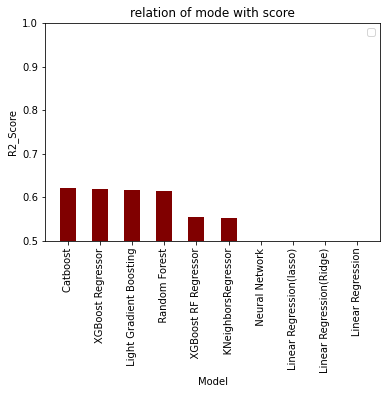

In [80]:
plt.bar(d1['Model'],d1['R2_Score'], color = 'maroon',width=.5)
plt.title('relation of mode with score')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('R2_Score')
plt.ylim(.5,1)
plt.legend()
plt.show()

In [81]:
#prediction

In [82]:
x_predict = [0,25,2020,1]
x_predict = np.array(x_predict).reshape(1,-1)

In [83]:
predicted_value = lgbm.predict(x_predict) 
print("Predicted value : ",predicted_value)

Predicted value :  [123.04709106]


In [84]:
x_predict = [0,25,2025,1]

x_predict = np.array(x_predict).reshape(1,-1)

In [85]:
for name, model in models.items():
    x_predict = [0,25,2020,1]
    x_predict = np.array(x_predict).reshape(1,-1)
    predicted_value = model.predict(x_predict) 
    print("Model Name:",model)
    print("Predicted value : ",predicted_value)
    print("---------------------------------------------------------------")
    

Model Name: Ridge()
Predicted value :  [146.30775511]
---------------------------------------------------------------
Model Name: MLPRegressor()
Predicted value :  [178.66842552]
---------------------------------------------------------------
Model Name: RandomForestRegressor()
Predicted value :  [120.16276615]
---------------------------------------------------------------
Model Name: <catboost.core.CatBoostRegressor object at 0x00000162E49A8040>
Predicted value :  [121.37498059]
---------------------------------------------------------------
Model Name: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delt

## hyperparameter tuning

In [86]:
 model_params = {
    'Catboost': {
        'model':  CatBoostRegressor(verbose=0),
        'params' : {
            'iterations': [100, 200, 400],
            'learning_rate': [0.03, 0.1],
            'depth': [2, 4, 6, 8],
            'l2_leaf_reg': [0.2, 0.5, 1, 3]
        }  
    },
    'XGBoost Regressor': {
        'model': XGBRegressor(),
        'params' : {
            'n_estimators': [100,200,400],
             
        }
    }
 }

In [87]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    y_pre=clf.predict(X_test)
    r2_score(y_test, y_pre)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    print(scores)
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

[{'model': 'Catboost', 'best_score': 0.6279834610830913, 'best_params': {'depth': 8, 'iterations': 400, 'l2_leaf_reg': 3, 'learning_rate': 0.1}}]
[{'model': 'Catboost', 'best_score': 0.6279834610830913, 'best_params': {'depth': 8, 'iterations': 400, 'l2_leaf_reg': 3, 'learning_rate': 0.1}}, {'model': 'XGBoost Regressor', 'best_score': 0.6249072714486922, 'best_params': {'n_estimators': 100}}]


,model,best_score,best_params
0,Catboost,0.627983,"{'depth': 8, 'iterations': 400, 'l2_leaf_reg':..."
1,XGBoost Regressor,0.624907,{'n_estimators': 100}


In [88]:
import catboost
model = catboost.CatBoostRegressor(verbose=0,depth= 8, iterations=400, l2_leaf_reg=3,learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = get_r2(y_test, y_pred)
print(' R^2: {:.5f}'.format(r2))

 R^2: 0.62051


In [89]:
 model_params = {
    'Light Gradient Boosting' : {
        'model': LGBMRegressor(),
        'params': {
            'boosting_type': ['gbdt','dart','goss'],
            'n_estimators': [100,200,400]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100,200,400],
            'criterion': ['mse','mae']
            
        }
    }
 }

In [90]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    clf.fit(X_train,y_train)
    y_pre=clf.predict(X_test)
    r2_score(y_test, y_pre)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,Light Gradient Boosting,0.620143,"{'boosting_type': 'gbdt', 'n_estimators': 200}"
1,Random Forest,0.602875,"{'criterion': 'mse', 'n_estimators': 200}"


In [91]:
import catboost as cb
model = cb.CatBoostRegressor(loss_function='RMSE')
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [92]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model.grid_search(grid,train_dataset)
pred1 = model.predict(X_test)
r2 = (y_test, y_pred)
print(' R^2: {:.5f}'.format(r2))


0:	learn: 185.2954243	test: 186.0818468	best: 186.0818468 (0)	total: 3.63ms	remaining: 359ms
1:	learn: 181.1384976	test: 181.9790400	best: 181.9790400 (1)	total: 6.69ms	remaining: 328ms
2:	learn: 177.0890869	test: 177.9498153	best: 177.9498153 (2)	total: 9.63ms	remaining: 311ms
3:	learn: 173.1717659	test: 174.0844420	best: 174.0844420 (3)	total: 12.5ms	remaining: 299ms
4:	learn: 169.2993626	test: 170.2340584	best: 170.2340584 (4)	total: 15.4ms	remaining: 293ms
5:	learn: 165.6138383	test: 166.5759744	best: 166.5759744 (5)	total: 18.4ms	remaining: 288ms
6:	learn: 162.1484200	test: 163.1326545	best: 163.1326545 (6)	total: 21.2ms	remaining: 282ms
7:	learn: 158.7825309	test: 159.8137297	best: 159.8137297 (7)	total: 24ms	remaining: 276ms
8:	learn: 155.5422291	test: 156.6147051	best: 156.6147051 (8)	total: 27ms	remaining: 273ms
9:	learn: 152.5001960	test: 153.6064539	best: 153.6064539 (9)	total: 29.8ms	remaining: 268ms
10:	learn: 149.5475079	test: 150.6937661	best: 150.6937661 (10)	total: 32.

TypeError: unsupported format string passed to tuple.__format__

There is no much change after hypertuning. Also catboost has the best r2 score with .620585 . Hence we have taken catboost model for deployment. 